In [29]:
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
df = pd.read_csv('../data/bt/gld_gdx_aapl_spy__1H.csv', parse_dates=True, index_col=0, header=[0, 1])
df = df['Close']
df.head()

,AAPL,GDX,GLD,SPY
Datetime,,,,
2022-10-07 14:30:00-04:00,139.721893,24.440001,157.720001,361.619995
2022-10-07 15:30:00-04:00,140.080002,24.420000,157.919998,362.799988
2022-10-10 09:30:00-04:00,140.050003,24.250000,155.869995,362.489990
2022-10-10 10:30:00-04:00,140.020004,24.195000,155.419998,360.339996
2022-10-10 11:30:00-04:00,139.747498,24.190001,155.265106,359.050110


In [3]:
df.shape

(3492, 4)

In [4]:
tickers = df.columns

In [5]:
for col in tickers:
    df[f'{col}_return'] = np.log(df[col] / df[col].shift(1))
    df[f'{col}_direction'] = np.where(df[f'{col}_return'] > 0, 1, 0)

df.dropna(inplace=True)

In [37]:
df[[ticker+'_direction' for ticker in tickers]].head()

,AAPL_direction,GDX_direction,GLD_direction,SPY_direction
Datetime,,,,
2022-10-07 15:30:00-04:00,1,0,1,1
2022-10-10 09:30:00-04:00,0,0,0,0
2022-10-10 10:30:00-04:00,0,0,0,0
2022-10-10 11:30:00-04:00,0,0,0,0
2022-10-10 12:30:00-04:00,1,0,1,0


In [38]:
batch = df[[ticker+'_direction' for ticker in tickers]].iloc[:100].copy()

In [39]:
link = linkage(batch, 'ward', 'euclidean')

In [40]:
link[:5]

array([[  0.,   5.,   0.,   2.],
       [  1.,   2.,   0.,   2.],
       [  3., 101.,   0.,   3.],
       [  8., 102.,   0.,   4.],
       [  7.,  35.,   0.,   2.]])

In [41]:
len(link)

99

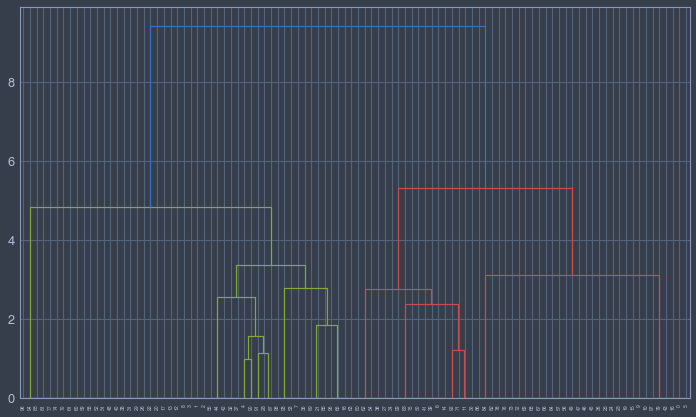

In [42]:
dn = dendrogram(link)

In [43]:
batch['cluster'] = fcluster(link, 3, criterion='distance')

In [44]:
batch.groupby('cluster').mean()

,AAPL_direction,GDX_direction,GLD_direction,SPY_direction
cluster,,,,
1,0.000000,0.000000,0.0,0.000000
2,0.500000,0.800000,0.2,0.000000
3,0.000000,0.583333,1.0,0.333333
4,0.777778,0.388889,0.0,1.000000
5,1.000000,1.000000,1.0,1.000000
6,1.000000,0.000000,1.0,1.000000


<AxesSubplot:xlabel='cluster'>

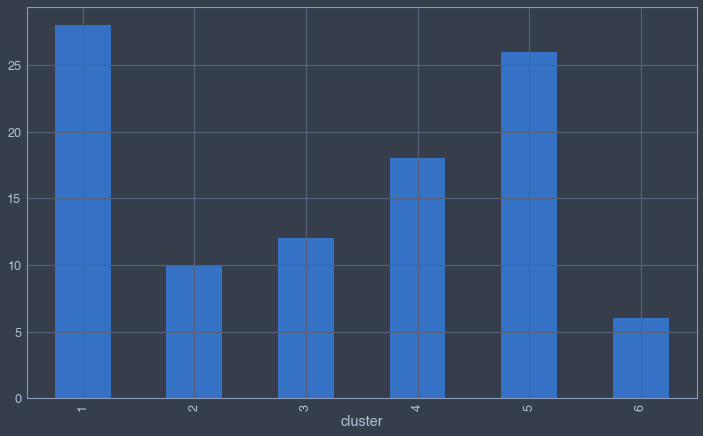

In [45]:
batch.groupby('cluster').size().plot.bar()